### Week5-4&5. Euler-Cromer 방법: 외부힘의 효과와 공명현상 (Demo. 4-13a, 4-13b)

이제 우리는 외부 힘이 사인의 함수로 주어지는 $F(t) = Asin(\omega t)$ 경우에 대해서 외부효과가 damping 경향에 어떤 영향을 알아보고, resonance 에 대해 살펴보자. 이때, 초기변수는 다음과 같다: $A = 0.5$ and $\omega = 3$.


N_t: 5000


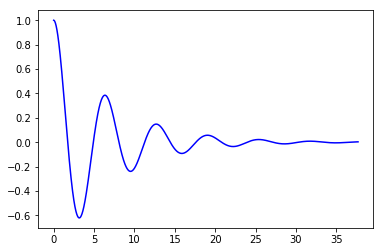

N_t: 5000


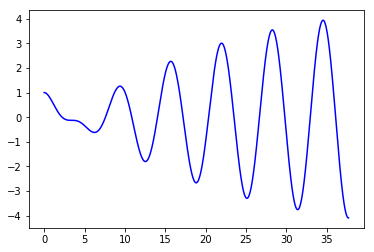

In [10]:
from math import pi, sin
import matplotlib.pyplot as plt

def EulerCromer(f, s, F, m, T, U_0, V_0, dt):
    from numpy import zeros, linspace
    N_t = int(round(T/dt))
    print('N_t:', N_t)
    t = linspace(0, N_t*dt, N_t+1)
    
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    
    # Initial condition
    u[0] = U_0
    v[0] = V_0
    
    # Step equations forward in time
    for n in range(N_t):
        v[n+1] = v[n] + dt*(1./m)*(F(t[n]) - f(v[n]) - s(u[n]))
        u[n+1] = u[n] + dt*v[n+1]
    return u, v, t

def linear_damping_sine_excitation():
    b = 0.1
    f = lambda v: b*v
    s = lambda u: k*u
    from math import pi, sin, cos
    w = 1
    A = 0.5
    #F = lambda t: A*sin(t)
    F = lambda t: A*sin(w*t)
    
    m = 1
    k = 1
    U_0 = 1
    V_0 = 0
    
    T = 12*pi
    dt = T/5000.
    
    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)

    index = int(len(u)*100/100.)
    plt.plot(t[-index:], u[-index:], 'b-')
    plt.show()

    
def linear_damping():
    b = 0.3
    f = lambda v: b*v
    s = lambda u: k*u
    F = lambda t: 0
    
    m = 1
    k = 1
    U_0 = 1
    V_0 = 0
    
    T = 12*pi
    dt = T/5000.
    
    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)

    index = int(len(u)*100/100.)
    plt.plot(t[-index:], u[-index:], 'b-')
    plt.show()

if __name__ == '__main__':
    linear_damping()
    linear_damping_sine_excitation()